In [7]:
# !pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
import seaborn as sns


In [8]:
import seaborn as sns

In [9]:
df_tracks = pd.read_csv('spotify data.csv')
print(df_tracks.head(5))  # Display the first 5 rows

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [10]:
# Check for null values

print(pd.isnull(df_tracks).sum())

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
dtype: int64


In [11]:
# Display info about the DataFrame
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40016 non-null  object 
 1   name              40016 non-null  object 
 2   popularity        40016 non-null  int64  
 3   duration_ms       40016 non-null  int64  
 4   explicit          40016 non-null  int64  
 5   artists           40016 non-null  object 
 6   id_artists        40016 non-null  object 
 7   release_date      40015 non-null  object 
 8   danceability      40015 non-null  float64
 9   energy            40015 non-null  float64
 10  key               40015 non-null  float64
 11  loudness          40015 non-null  float64
 12  mode              40015 non-null  float64
 13  speechiness       40015 non-null  float64
 14  acousticness      40015 non-null  float64
 15  instrumentalness  40015 non-null  float64
 16  liveness          40015 non-null  float6

In [12]:
# Convert 'release_date' to datetime
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')


In [13]:
# Sort by popularity and display the top 10 least popular tracks
sorted_df = df_tracks.sort_values('popularity', ascending=True).head(10)
print(sorted_df)


                        id                                 name  popularity  \
15  0cC9CYjLRIzwchQ42xVnq6  Capítulo 1.23 - Banquero Anarquista           0   
17  0grXU6GKVNCVMJbseA0Uhe  Capítulo 1.10 - Banquero Anarquista           0   
18  0kCB1bDVBC8gWCFcnJyIZc                   Ca C'est Une Chose           0   
19  0l3BQsVJ7F76wlN5QhJzaP          El Vendaval - Remasterizado           0   
20  0pXUGQcBxfoQXg2e7G9Wwk                            Ta Bouche           0   
2   07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3   08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4   08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   
5   0BRXJHRNGQ3W4v9frnSfhu                            Ave Maria           0   
6   0Dd9ImXtAtGwsmsAD69KZT                       La Butte Rouge           0   

    duration_ms  explicit                  artists  \
15        96600         0      ['Fernando Pessoa']   
17        95800       

In [14]:
# Display descriptive statistics for numerical columns
print(df_tracks.describe().transpose())


                    count                           mean                  min  \
popularity        40016.0                      10.924355                  0.0   
duration_ms       40016.0                  208449.768718               3344.0   
explicit          40016.0                       0.001874                  0.0   
release_date        22100  1946-08-25 14:24:54.733031680  1922-01-06 00:00:00   
danceability      40015.0                       0.514662                  0.0   
energy            40015.0                       0.295528                  0.0   
key               40015.0                       5.089416                  0.0   
loudness          40015.0                     -14.500218                -60.0   
mode              40015.0                       0.714282                  0.0   
speechiness       40015.0                       0.148685                  0.0   
acousticness      40015.0                       0.834474                  0.0   
instrumentalness  40015.0   

In [15]:
# Get the most popular tracks
most_popular = df_tracks.query('popularity > 90').sort_values('popularity', ascending=False)
print(most_popular)  # Display the top 10 most popular tracks


Empty DataFrame
Columns: [id, name, popularity, duration_ms, explicit, artists, id_artists, release_date, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]
Index: []


In [16]:
# Set 'release_date' as index and convert it to datetime
df_tracks.set_index("release_date", inplace=True)
df_tracks.index = pd.to_datetime(df_tracks.index)  # Ensure index is datetime
print(df_tracks.head())  # Display the first few rows with the new index


                                  id                                 name  \
release_date                                                                
1922-02-22    35iwgR4jXetI318WEWsa1Q                                Carve   
1922-06-01    021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
1922-03-21    07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
1922-03-21    08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
NaT           08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   

              popularity  duration_ms  explicit              artists  \
release_date                                                           
1922-02-22             6       126903         0              ['Uli']   
1922-06-01             0        98200         0  ['Fernando Pessoa']   
1922-03-21             0       181640         0  ['Ignacio Corsini']   
1922-03-21             0       176907         0  ['Ignacio Corsini']   
NaT                    0    

In [17]:
# Create a new column for duration in seconds
df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x: round(x / 1000))
df_tracks.drop("duration_ms", inplace=True, axis=1)  # Drop the 'duration_ms' column
print(df_tracks["duration"].head())

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
NaT           163
Name: duration, dtype: int64


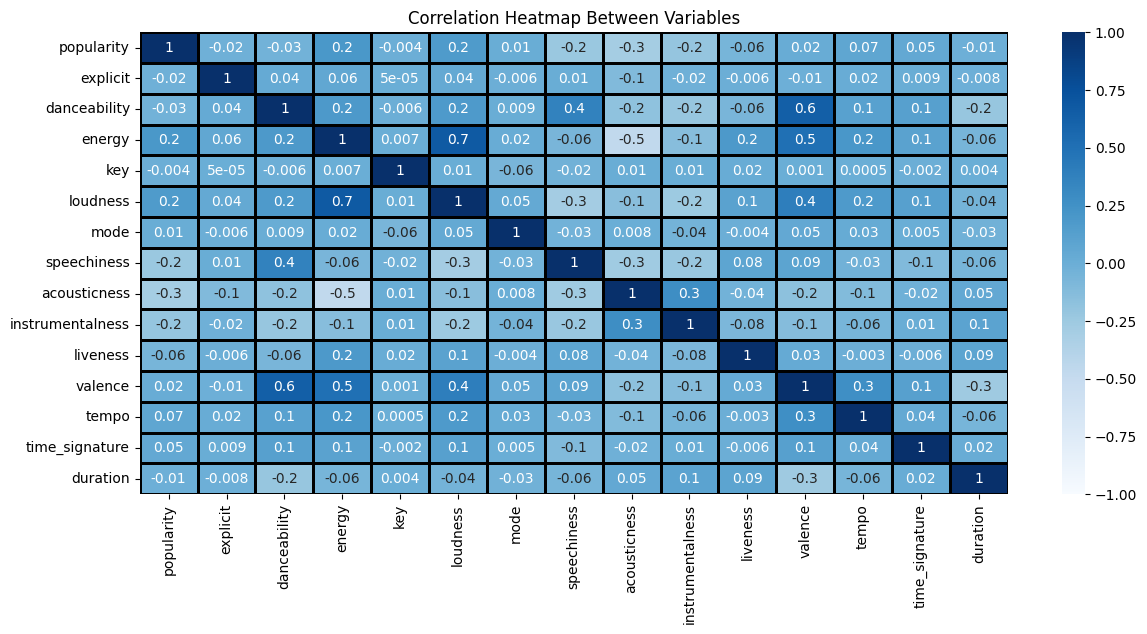

In [18]:
# Filter out non-numeric columns
numeric_df = df_tracks.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_df = numeric_df.corr(method="pearson")

# Plot the heatmap with a blue color palette
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="Blues", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()


In [19]:
sample_df = df_tracks.sample(int(0.005*len(df_tracks)))


In [20]:
print(len(sample_df))

200


<Figure size 1000x600 with 0 Axes>

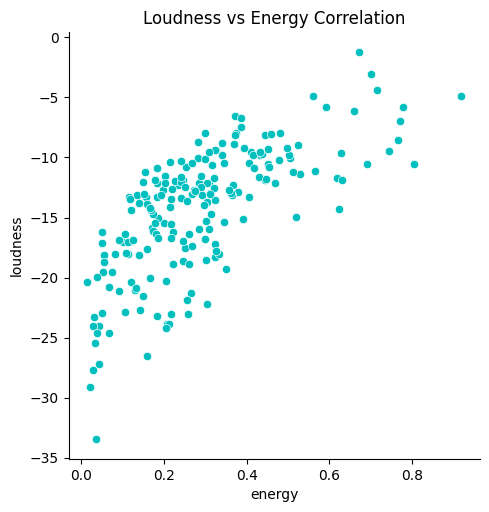

In [21]:


# Plot the data
plt.figure(figsize=(10, 6))
sns.relplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")
plt.show()


[Text(0.5, 1.0, 'popularity vs acousticness correlation')]

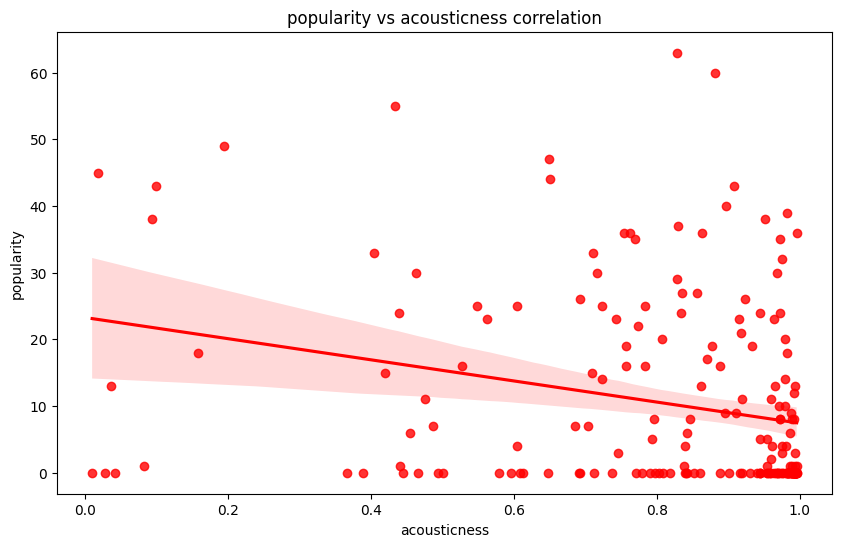

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "popularity", x = "acousticness", color = "r").set(title = "popularity vs acousticness correlation")

In [27]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.data=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

In [28]:
#pip install --user seaborn==0.11.0

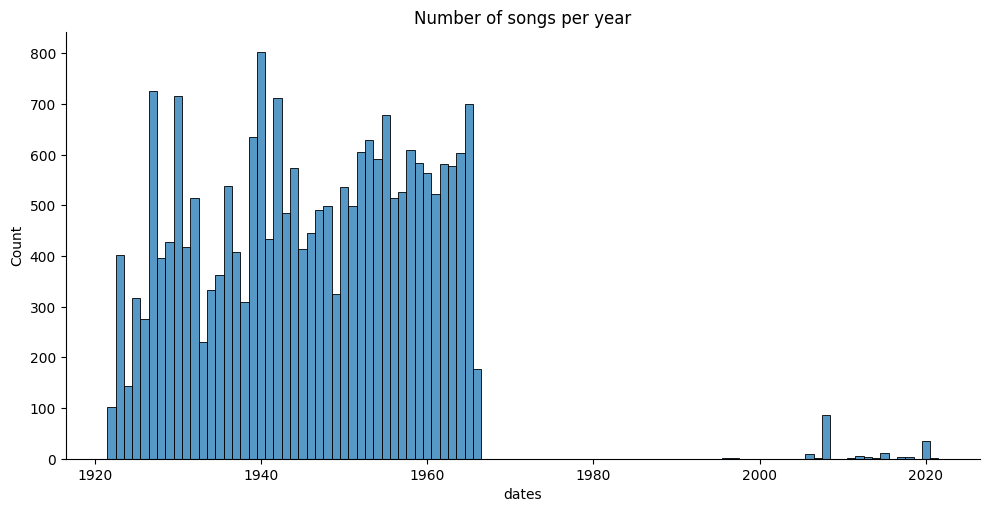

In [29]:
sns.displot(years,discrete=True,aspect=2,height=5 , kind="hist").set(title="Number of songs per year")

In [ ]:
pd.read_csv('new spotify data.ipynb', delimiter='\t', chunksize=chunk_size)
pd.read_csv('new spotify data.ipynb', chunksize=chunk_size, on_bad_lines='skip')
pd.read_csv('new spotify data.ipynb', chunksize=chunk_size, header=None, names=['col1', 'col2', 'col3'])
pd.read_csv('new spotify data.ipynb', encoding='utf-8', chunksize=chunk_size)


In [ ]:
import pandas as pd

# Sample data for demonstration, replace this with your actual dataset
data = {'new spotify data.ipynb': ['1995', '1995-05', '1995-05-20', '2000', '2000-11']}
df = pd.DataFrame(data)

# Step 1: Ensure all entries in 'release_date' are strings (in case they are not)
df[''] = df['new spotify data.ipynb'].astype(str)

# Step 2: Convert the 'release_date' to datetime format
# Coerce will handle invalid dates
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%Y-%m-%d')

# Step 3: Extract only the year from the 'release_date'
df['year'] = df['release_date'].dt.year

# Display the result
print(df)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'your_file.csv' with your actual file)
df_tracks = pd.read_csv('new spotify data.ipynb')  # Ensure that 'df_tracks' is defined here

# Assuming you have already processed the 'release_date' to extract the year:
df_tracks['year'] = pd.to_datetime(df_tracks['release_date'], errors='coerce').dt.year

# Step 2: Set up the total duration and years
total_dr = df_tracks['duration']  # Adjust this column name as per your dataset
years = df_tracks['year']

# Step 3: Plot the data
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=years, y=total_dr, ax=ax, errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total_dr = df_tracks['duration']  # Ensure it's a pandas Series or list
years = df_tracks['year']         # Ensure it's a pandas Series or list

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=years, y=total_dr, ax=ax, ci=None)  # ci=None to disable error bars
ax.set_title("Year vs Duration")
plt.xticks(rotation=90)

plt.show()
